In [1]:
from src.experiment import ExperimentInstance
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import tensorflow as tf
import random

In [2]:
dataset = 'aljarafe'

In [3]:
parameters = {'dataset': {'name': dataset, 
                          'params': {'seq_len': 41, 'pred_len': 24, 'shift': 24, 'crossval': True}}, 
              'selection': {'name': 'TSL', 
                            'params': {'regularization': 0.0088594323988978, 'residual': False}}, 
              'model': {'name': 'dense', 
                        'params': {'keep_dims': False, 'layers': 2, 'units': 47, 'dropout': 0.163322450886048, 'type': 'tensorflow'}}}

In [4]:
seed = 123
tf.random.set_seed(seed)
random.seed(seed)
np.random.seed(seed)
experiment = ExperimentInstance(parameters)
experiment.run()

{'dataset': {'name': 'aljarafe', 'params': {'seq_len': 41, 'pred_len': 24, 'shift': 24, 'select_timesteps': True, 'crossval': True}}, 'selection': {'name': 'TSL', 'params': {'regularization': 0.0088594323988978, 'residual': False}}, 'model': {'name': 'dense', 'params': {'keep_dims': False, 'layers': 2, 'units': 47, 'dropout': 0.163322450886048, 'type': 'tensorflow'}}}
12/12 [==============================] - 0s 909us/step


,mean_squared_error,root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2,mean_absolute_error_valid,root_mean_squared_error_valid,mean_squared_error_valid,dataset,dataset_name,...,model_params_layers,model_params_units,model_params_dropout,model_params_type,features,selected_features,duration,history,val_loss,code
0,387.042943,19.673407,15.375738,4.661060e-01,0.399990,15.269480,19.357206,374.701432,aljarafe,aljarafe,...,2,47,0.163322,tensorflow,"[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...","[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...",56.101107,"[0.6286128163337708, 0.4593040943145752, 0.424...",0.328433,64e1d51786e472c5447d0699d647d0a9
0,367.658383,19.174420,15.004328,3.886387e-01,0.422516,15.067374,19.202548,368.737839,aljarafe,aljarafe,...,2,47,0.163322,tensorflow,"[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...","[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...",52.127013,"[0.6198366284370422, 0.5479066967964172, 0.447...",0.329210,64e1d51786e472c5447d0699d647d0a9
0,274.659234,16.572846,13.015945,3.492712e-01,0.476622,15.005572,19.074139,363.822784,aljarafe,aljarafe,...,2,47,0.163322,tensorflow,"[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...","[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...",52.752467,"[0.6294542551040649, 0.4610697031021118, 0.391...",0.314584,64e1d51786e472c5447d0699d647d0a9
0,301.079353,17.351638,13.693583,4.293817e-01,0.542583,13.216327,16.723268,279.667707,aljarafe,aljarafe,...,2,47,0.163322,tensorflow,"[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...","[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...",50.557896,"[0.4900771975517273, 0.3728814721107483, 0.344...",0.242455,64e1d51786e472c5447d0699d647d0a9
0,301.180700,17.354558,13.668280,3.995883e-01,0.544193,13.645136,17.422798,303.553882,aljarafe,aljarafe,...,2,47,0.163322,tensorflow,"[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...","[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...",52.594543,"[0.5567485690116882, 0.42895084619522095, 0.40...",0.282032,64e1d51786e472c5447d0699d647d0a9
0,291.163939,17.063527,13.287745,4.123234e-01,0.501204,13.836903,17.608468,310.058128,aljarafe,aljarafe,...,2,47,0.163322,tensorflow,"[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...","[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...",47.460565,"[0.544580340385437, 0.3925390839576721, 0.3905...",0.281614,64e1d51786e472c5447d0699d647d0a9
0,281.581491,16.780390,13.248591,4.409343e-01,0.529867,13.585855,17.357212,301.272819,aljarafe,aljarafe,...,2,47,0.163322,tensorflow,"[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...","[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...",49.634087,"[0.49152839183807373, 0.37825915217399597, 0.3...",0.280557,64e1d51786e472c5447d0699d647d0a9
0,349.392154,18.692035,14.777003,3.867011e-01,0.443982,13.320895,16.882747,285.027139,aljarafe,aljarafe,...,2,47,0.163322,tensorflow,"[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...","[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...",52.778585,"[0.42953407764434814, 0.3341076374053955, 0.33...",0.248856,64e1d51786e472c5447d0699d647d0a9
0,252.007673,15.874750,12.430971,3.197107e-01,0.560623,14.244996,17.956967,322.452649,aljarafe,aljarafe,...,2,47,0.163322,tensorflow,"[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...","[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...",53.661866,"[0.4434563219547272, 0.3439388573169708, 0.326...",0.280128,64e1d51786e472c5447d0699d647d0a9
0,262.158829,16.191320,12.643423,4.038142e-01,0.489425,12.158440,15.736539,247.638652,aljarafe,aljarafe,...,2,47,0.163322,tensorflow,"[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...","[dd t-41, no2 t-41, pm10 t-41, vv t-41, tmp t-...",53.392201,"[0.35856083035469055, 0.271898478269577, 0.259...",0.219140,64e1d51786e472c5447d0699d647d0a9


## Error maps

In [5]:
dates, inputs, true, preds = experiment.raw_results_[-1]

with open(f'results/OzoneCrossVal/predictions/{dataset}_true.npy', 'wb') as f:
    np.save(f, true)

with open(f'results/OzoneCrossVal/predictions/{dataset}_preds.npy', 'wb') as f:
    np.save(f, preds)

dates = pd.date_range(datetime(2015, 1, 1) + timedelta(hours=24+1), datetime(2016, 1, 1), freq='H')
dates = dates[:len(true)]

mse = (true-preds)**2
results = pd.DataFrame({'Month': dates.month, 'Hour': dates.hour, 'Error': mse}).iloc[:-1].groupby(['Month', 'Hour']).mean().reset_index()
heatmap = results.pivot("Hour", "Month", "Error").apply(np.sqrt)

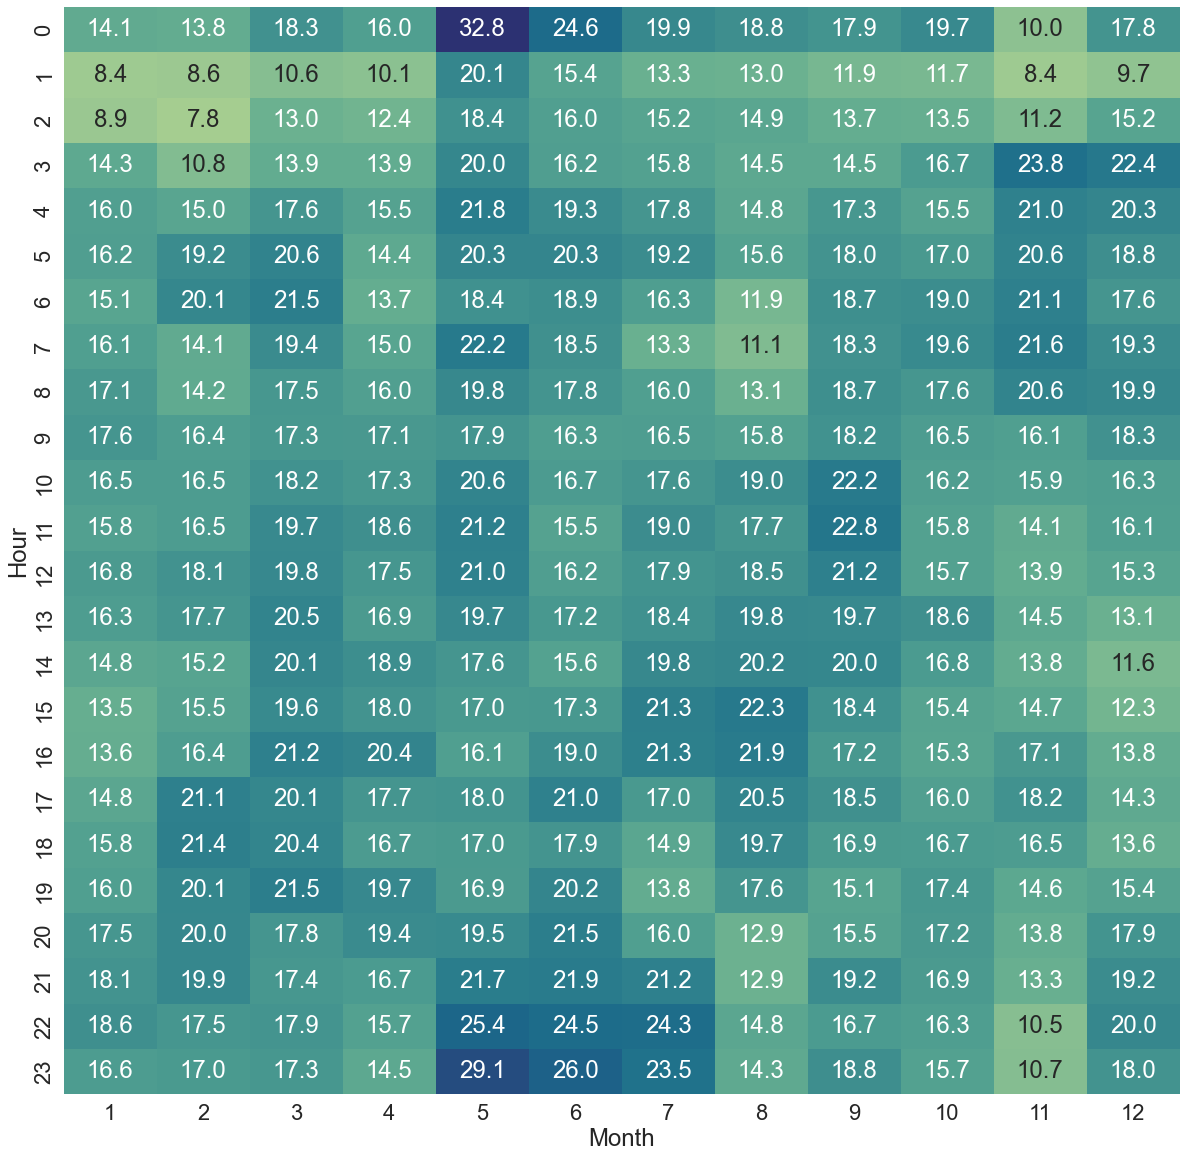

In [6]:
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
g = sns.heatmap(heatmap, annot=True, cmap="crest", fmt=".1f", cbar=False)
fig = g.get_figure()
fig.savefig(f"figures/ErrorMaps/{dataset.capitalize()}TSL.png") 

## Best/Worst predictions

In [7]:
preds = preds.reshape(-1, 24)
true = true.reshape(-1, 24)
mse_reshaped = np.sqrt(((true-preds)**2).mean(axis=1))
min_index = np.argmin(mse_reshaped)
best_dates = dates[min_index*24: min_index*24+24]
best_preds = preds[min_index]
best_trues = true[min_index]

max_index = np.argmax(mse_reshaped)

worst_dates = dates[max_index*24: max_index*24+24]
worst_preds = preds[max_index]
worst_trues = true[max_index]

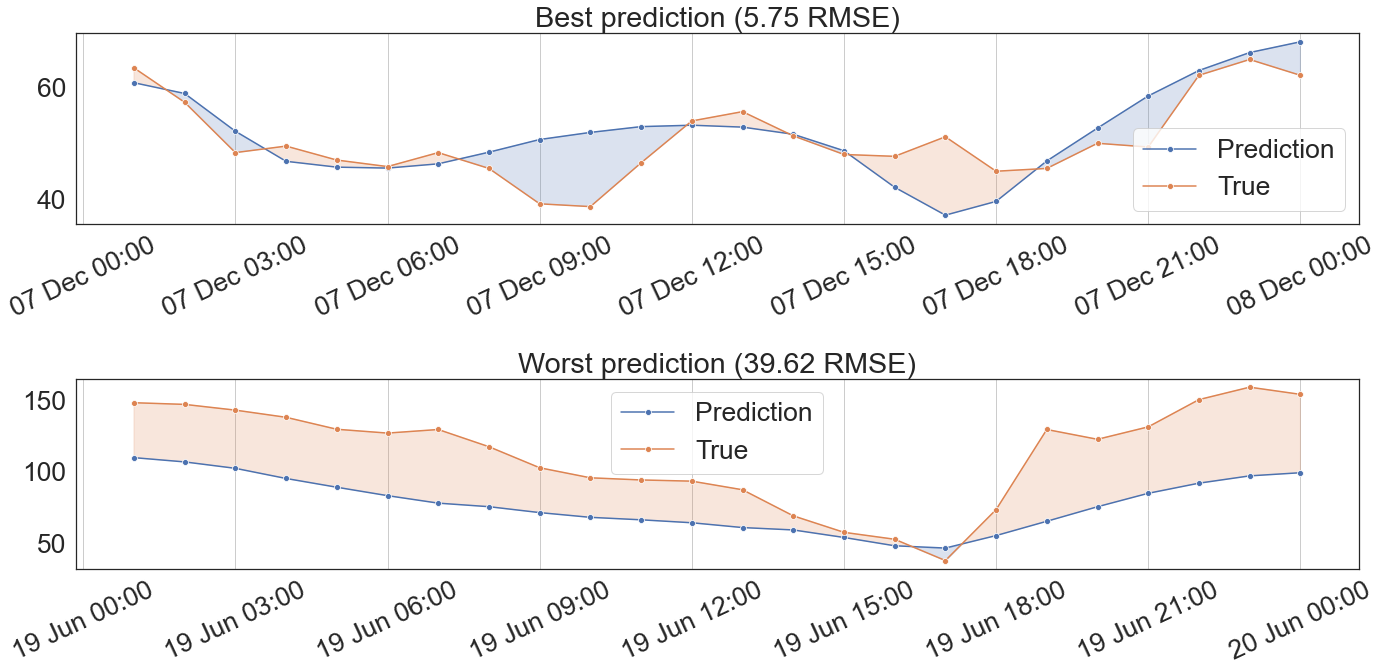

In [8]:
sns.set(style='white', font_scale=2.4)
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.lineplot(x=best_dates, y=best_preds, ax=ax[0], label='Prediction', marker='o')
sns.lineplot(x=best_dates, y=best_trues, ax=ax[0], label='True', marker='o')
ax[0].xaxis.grid() # vertical lines
ax[0].set_title(f'Best prediction ({round(mse_reshaped[min_index], 2)} RMSE)')
ax[0].fill_between(best_dates, best_preds, best_trues, where=(best_preds > best_trues), color='C0', alpha=0.2, interpolate=True)
ax[0].fill_between(best_dates, best_preds, best_trues, where=(best_preds <= best_trues), color='C1', alpha=0.2, interpolate=True)


sns.lineplot(x=worst_dates, y=worst_preds, ax=ax[1], label='Prediction', marker='o')
sns.lineplot(x=worst_dates, y=worst_trues, ax=ax[1], label='True', marker='o')
ax[1].xaxis.grid() # vertical lines
ax[1].set_title(f'Worst prediction ({round(mse_reshaped[max_index], 2)} RMSE)')
ax[1].fill_between(worst_dates, worst_preds, worst_trues, where=(worst_preds <= worst_trues), color='C1', alpha=0.2, interpolate=True)
ax[1].fill_between(worst_dates, worst_preds, worst_trues, where=(worst_preds > worst_trues), color='C0', alpha=0.2, interpolate=True)


date_form = DateFormatter("%d %b %H:00")
ax[0].xaxis.set_major_formatter(date_form)

ax[1].xaxis.set_major_formatter(date_form)


for label in ax[0].get_xticklabels():
    label.set_ha("center")
    label.set_rotation(25)

for label in ax[1].get_xticklabels():
    label.set_ha("center")
    label.set_rotation(25)

plt.tight_layout()

fig.savefig(f"figures/BestWorst/BestWorst{dataset.capitalize()}TSL.png", bbox_inches='tight') 